In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('sentimentdataset.csv')

In [4]:
data = data[['Text','Sentiment','Timestamp','Platform','Hashtags','Retweets','Likes']]

In [5]:
data['Sentiment'] = data['Sentiment'].str.strip()
data['Platform'] = data['Platform'].str.strip()

In [6]:
data.head()

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,Twitter,#Nature #Park,15.0,30.0
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,Twitter,#Traffic #Morning,5.0,10.0
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,Instagram,#Fitness #Workout,20.0,40.0
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,Facebook,#Travel #Adventure,8.0,15.0
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,Instagram,#Cooking #Food,12.0,25.0


In [7]:
data.shape

(732, 7)

In [8]:
data.describe()

,Retweets,Likes
count,732.000000,732.000000
mean,21.508197,42.901639
std,7.061286,14.089848
min,5.000000,10.000000
25%,17.750000,34.750000
50%,22.000000,43.000000
75%,25.000000,50.000000
max,40.000000,80.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Timestamp  732 non-null    object 
 3   Platform   732 non-null    object 
 4   Hashtags   732 non-null    object 
 5   Retweets   732 non-null    float64
 6   Likes      732 non-null    float64
dtypes: float64(2), object(5)
memory usage: 40.2+ KB


In [10]:
data.isnull()

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
727,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False
730,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
Platform     0
Hashtags     0
Retweets     0
Likes        0
dtype: int64

In [12]:
data['Sentiment'].nunique()

191

In [13]:
data['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral', 'Anger', 'Fear', 'Sadness',
       'Disgust', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment',
       'Admiration', 'Affection', 'Awe', 'Disappointed', 'Surprise',
       'Acceptance', 'Adoration', 'Anticipation', 'Bitter', 'Calmness',
       'Confusion', 'Excitement', 'Kind', 'Pride', 'Shame', 'Elation',
       'Euphoria', 'Contentment', 'Serenity', 'Gratitude', 'Hope',
       'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 'Enthusiasm',
       'Fulfillment', 'Reverence', 'Despair', 'Grief', 'Loneliness',
       'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety',
       'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Curiosity',
       'Indifference', 'Numbness', 'Melancholy', 'Nostalgia',
       'Ambivalence', 'Determination', 'Zest', 'Hopeful', 'Proud',
       'Grateful', 'Empathetic', 'Compassionate', 'Playful',
       'Free-spirited', 'Inspired', 'Confident', 'Bitterness', 'Yearning',
       'Fearful', 'Apprehensiv

In [14]:
classify_sentiments = {
  'Positive':['Positive', 'Positivity', 'Success', 'Friendship', 'Energy', 'Motivation', 'Kindness', 'Happiness', 'Calmness', 'Inspired', 'Happy', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Awe', 'Contentment', 'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Excitement', 'Kind', 'Pride', 'Arousal', 'Elation', 'Euphoria', 'Fulfillment', 'Reverence', 'Anticipation', 'Adoration', 'Enthusiasm', 'Inspiration', 'Hopeful', 'Proud', 'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Free-spirited', 'Confident', 'Zest', 'Overjoyed', 'Thrill', 'Bittersweet', 'JoyfulReunion', 'Satisfaction', 'Blessed', 'Reflection', 'Appreciation', 'Confidence', 'Accomplishment', 'Wonderment', 'Optimism', 'Enchantment', 'Intrigue', 'PlayfulJoy', 'Mindfulness', 'DreamChaser', 'Elegance', 'Whimsy', 'Creativity', 'Radiance', 'Wonder', 'Rejuvenation', 'Coziness', 'Adventure', 'Melodic', 'FestiveJoy', 'InnerJourney', 'Freedom', 'Dazzle', 'Adrenaline', 'ArtisticBurst', 'CulinaryOdyssey', 'Resilience', 'Immersion', 'Spark', 'Marvel', 'Exploration', 'Amazement', 'Romance', 'Captivation', 'Tranquility', 'Grandeur', 'Celebration', 'Charm', 'Ecstasy', 'Colorful', 'Hypnotic', 'Connection', 'Iconic', 'Journey', 'Engagement', 'Touched', 'Suspense', 'Triumph', 'Heartwarming', 'Solace', 'Breakthrough', 'Joy in Baking', 'Envisioning History', 'Imagination', 'Vibrancy', 'Mesmerizing', 'Culinary Adventure', 'Winter Magic', 'Thrilling Journey', "Nature's Beauty", 'Celestial Wonder', 'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom", 'Whispers of the Past', 'Relief'],
  'Negative':['Negative', 'Bad', 'Sad', 'Embarrassed','Hate', 'Bitter', 'Confusion', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Shame', 'Despair', 'Grief', 'Loneliness', 'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Bitterness', 'Yearning', 'Fearful', 'Apprehensive', 'Overwhelmed', 'Jealous', 'Devastated', 'Frustrated', 'Envious', 'Dismissive', 'Heartbreak', 'Betrayal', 'Suffering', 'EmotionalStorm', 'Isolation', 'Disappointment', 'LostLove', 'Exhaustion', 'Sorrow', 'Darkness', 'Desperation', 'Ruins', 'Desolation', 'Loss', 'Heartache', 'Solitude'],
  'Neutral':['Neutral',	'Emotion', 'Surprise', 'Acceptance', 'Curiosity', 'Mischievous', 'Indifference', 'Numbness', 'Melancholy', 'Nostalgia', 'Ambivalence', 'Determination', 'Pensive', 'Harmony', 'Mindfulness', 'Contemplation', 'Reflection', 'Pressure', 'Obstacle', 'Sympathy', 'Miscalculation', 'Challenge', 'Renewed Effort'],
}

In [15]:
def sentiment_class(sentiment):
  for sentiment_class, sentiment_list in classify_sentiments.items():
    if sentiment in sentiment_list:
      return sentiment_class
  return "Other"

data['SentimentClasses'] = data['Sentiment'].apply(sentiment_class)

In [16]:
data.head()

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,SentimentClasses
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,Twitter,#Nature #Park,15.0,30.0,Positive
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,Twitter,#Traffic #Morning,5.0,10.0,Negative
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,Instagram,#Fitness #Workout,20.0,40.0,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,Facebook,#Travel #Adventure,8.0,15.0,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,Instagram,#Cooking #Food,12.0,25.0,Neutral


In [17]:
data['SentimentClasses'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [18]:
data.head()

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,SentimentClasses
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,Twitter,#Nature #Park,15.0,30.0,Positive
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,Twitter,#Traffic #Morning,5.0,10.0,Negative
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,Instagram,#Fitness #Workout,20.0,40.0,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,Facebook,#Travel #Adventure,8.0,15.0,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,Instagram,#Cooking #Food,12.0,25.0,Neutral


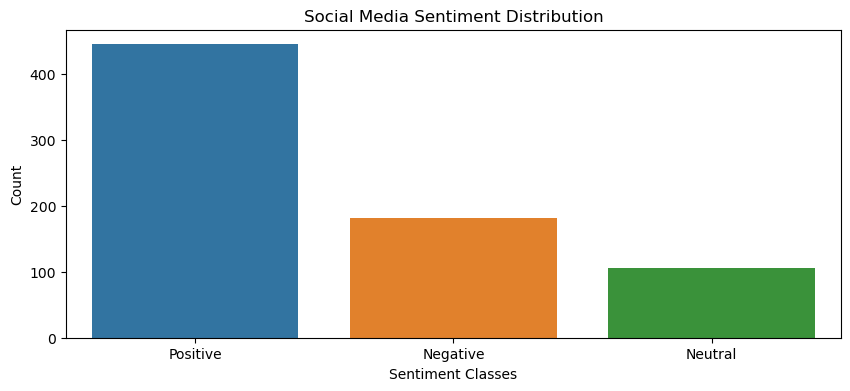

In [19]:
# Social Media Sentiment Visualisation
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.countplot(x='SentimentClasses', data=data)
plt.title('Social Media Sentiment Distribution')
plt.xlabel('Sentiment Classes')
plt.ylabel('Count')
plt.savefig('Social Media Sentiment.png', bbox_inches = 'tight')
plt.show()

In [20]:
#Twitter/X Sentiment Distribution
TwitterSentiments = data.loc[data['Platform'] == 'Twitter']
TwitterSentiments.head()

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,SentimentClasses
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,Twitter,#Nature #Park,15.0,30.0,Positive
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,Twitter,#Traffic #Morning,5.0,10.0,Negative
5,Feeling grateful for the little things in lif...,Positive,2023-01-16 09:10:00,Twitter,#Gratitude #PositiveVibes,25.0,50.0,Positive
8,Political discussions heating up on the timel...,Negative,2023-01-17 08:00:00,Twitter,#Politics #Debate,30.0,60.0,Negative
11,Feeling a bit under the weather today. ...,Negative,2023-01-18 10:30:00,Twitter,#SickDay #Health,7.0,15.0,Negative


In [21]:
TwitterSentiments.describe()

,Retweets,Likes
count,243.000000,243.000000
mean,20.860082,41.559671
std,6.636128,13.257445
min,5.000000,10.000000
25%,17.000000,34.000000
50%,20.000000,40.000000
75%,25.000000,50.000000
max,40.000000,80.000000


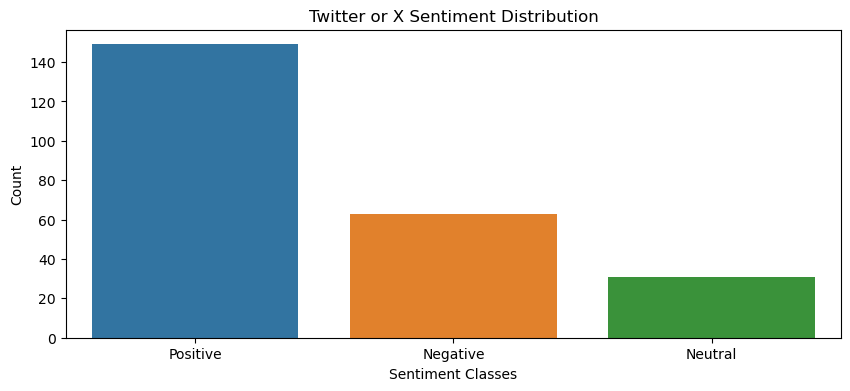

In [22]:
# Twitter Sentiment Visualisation
plt.figure(figsize=(10, 4))
sns.countplot(x='SentimentClasses', data=TwitterSentiments)
plt.title('Twitter or X Sentiment Distribution')
plt.xlabel('Sentiment Classes')
plt.ylabel('Count')
plt.savefig('Twitter Sentiment.png', bbox_inches = 'tight')
plt.show()

In [23]:
#Facebook Sentiment Distribution
FacebookSentiments = data.loc[data['Platform'] == 'Facebook']
FacebookSentiments.head()

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,SentimentClasses
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,Facebook,#Travel #Adventure,8.0,15.0,Positive
6,Rainy days call for cozy blankets and hot coc...,Positive,2023-01-16 14:45:00,Facebook,#RainyDays #Cozy,10.0,20.0,Positive
9,Missing summer vibes and beach days. ...,Neutral,2023-01-17 12:20:00,Facebook,#Summer #BeachDays,18.0,35.0,Neutral
12,Exploring the city's hidden gems. ...,Positive,2023-01-18 14:50:00,Facebook,#CityExplore #HiddenGems,12.0,25.0,Positive
15,Reflecting on the past and looking ahead. ...,Positive,2023-01-19 13:20:00,Facebook,#Reflection #Future,20.0,40.0,Positive


In [24]:
FacebookSentiments.describe()

,Retweets,Likes
count,231.000000,231.000000
mean,20.969697,41.870130
std,6.411534,12.763757
min,7.000000,15.000000
25%,16.000000,32.000000
50%,22.000000,45.000000
75%,25.000000,50.000000
max,40.000000,80.000000


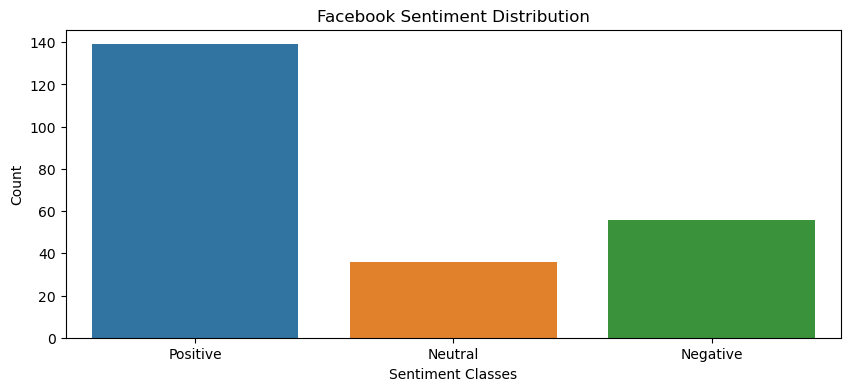

In [25]:
# Facebook Sentiment Visualisation
plt.figure(figsize=(10, 4))
sns.countplot(x='SentimentClasses', data=FacebookSentiments)
plt.title('Facebook Sentiment Distribution')
plt.xlabel('Sentiment Classes')
plt.ylabel('Count')
plt.savefig('Facebook Sentiment.png', bbox_inches = 'tight')
plt.show()

In [26]:
#Instagram Sentiment Distribution
InstagramSentiments = data.loc[data['Platform'] == 'Instagram']
InstagramSentiments.head()

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,SentimentClasses
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,Instagram,#Fitness #Workout,20.0,40.0,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,Instagram,#Cooking #Food,12.0,25.0,Neutral
7,The new movie release is a must-watch! ...,Positive,2023-01-16 19:30:00,Instagram,#MovieNight #MustWatch,15.0,30.0,Positive
10,Just published a new blog post. Check it out!...,Positive,2023-01-17 15:15:00,Instagram,#Blogging #NewPost,22.0,45.0,Positive
13,"New year, new fitness goals! 💪 ...",Positive,2023-01-18 18:00:00,Instagram,#NewYear #FitnessGoals,28.0,55.0,Positive


In [27]:
InstagramSentiments.describe()

,Retweets,Likes
count,258.000000,258.000000
mean,22.600775,45.089147
std,7.855673,15.681528
min,7.000000,15.000000
25%,18.000000,35.000000
50%,22.000000,45.000000
75%,28.000000,55.000000
max,40.000000,80.000000


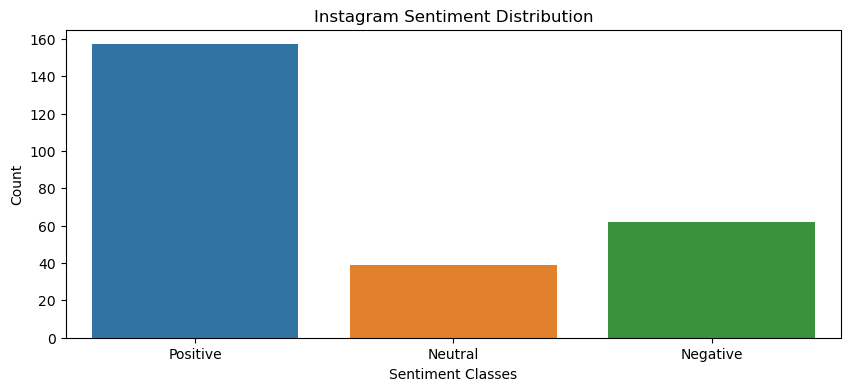

In [28]:
# Instagram Sentiment Visualisation
plt.figure(figsize=(10, 4))
sns.countplot(x='SentimentClasses', data=InstagramSentiments)
plt.title('Instagram Sentiment Distribution')
plt.xlabel('Sentiment Classes')
plt.ylabel('Count')
plt.savefig('Instagram Sentiment.png', bbox_inches = 'tight')
plt.show()

In [29]:
data.head()

,Text,Sentiment,Timestamp,Platform,Hashtags,Retweets,Likes,SentimentClasses
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,Twitter,#Nature #Park,15.0,30.0,Positive
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,Twitter,#Traffic #Morning,5.0,10.0,Negative
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,Instagram,#Fitness #Workout,20.0,40.0,Positive
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,Facebook,#Travel #Adventure,8.0,15.0,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,Instagram,#Cooking #Food,12.0,25.0,Neutral


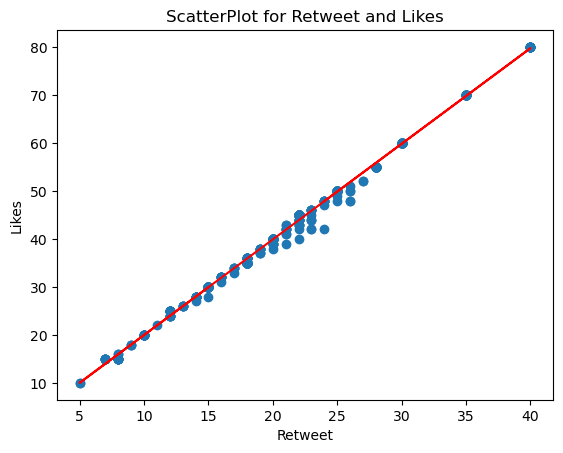

In [30]:
#ScatterPlot for Retweets and Likes
import numpy as np
x = data['Retweets']
y = data['Likes']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')
plt.title('ScatterPlot for Retweet and Likes')
plt.xlabel('Retweet')
plt.ylabel('Likes')
plt.savefig('Scatter Regresion Line.png', bbox_inches = 'tight')
plt.show()

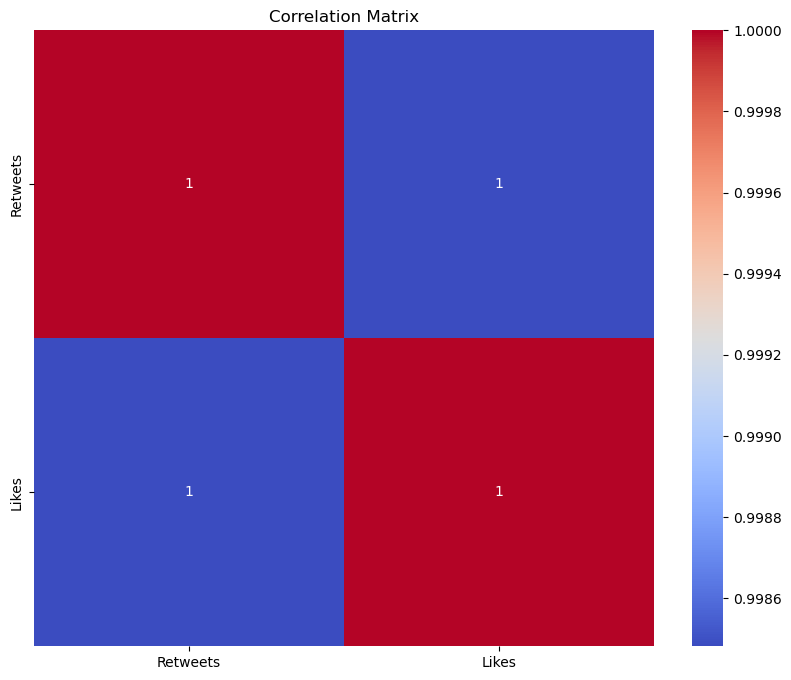

In [31]:
#Correlation Matrix
correlation_matrix = data[['Retweets', 'Likes']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('Like and Retweet Correlation.png', bbox_inches = 'tight')
plt.show()

In [45]:
#Model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

data["Text"] = data["Text"].str.lower() 
data["Text"] = data["Text"].str.replace("[^\w\s#]", "", regex=True) 

vectorizer = CountVectorizer()
features = vectorizer.fit_transform(data["Text"])

X_train, X_test, y_train, y_test = train_test_split(features, data["SentimentClasses"], test_size=0.2)

model = MultinomialNB()

num_epochs = 10 

training_accuracy = []
testing_accuracy = []

for epoch in range(num_epochs):
    model.partial_fit(X_train, y_train, classes=np.unique(data["SentimentClasses"]))  

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    training_accuracy.append(model.score(X_train, y_train))
    testing_accuracy.append(model.score(X_test, y_test))

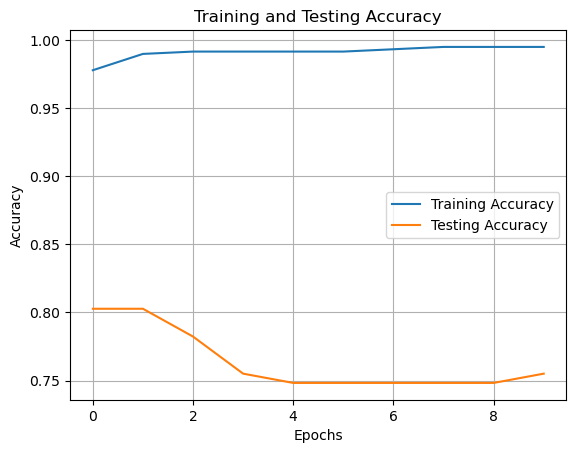

In [46]:
# Plot accuracy
plt.plot(range(num_epochs), training_accuracy, label='Training Accuracy')
plt.plot(range(num_epochs), testing_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('Training and Testing Accuracy.png', bbox_inches = 'tight')
plt.show()

In [47]:
import re

def predict_sentiment(text):
    new_text = text.lower()
    new_text = re.sub(r"[^\w\s#]", "", new_text) 

    new_features = vectorizer.transform([new_text])

    predicted_sentiment = model.predict(new_features)[0]

    return predicted_sentiment

In [48]:
# Enter custom text
new_text = "This model is working properly"
sentiment = predict_sentiment(new_text)

print(f"Predicted sentiment for '{new_text}': {sentiment}")

Predicted sentiment for 'This model is working properly': Positive
